In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [70]:
df = pd.read_csv("movies.csv")
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [72]:
# Get percentage of missing data by column

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} -- {}%'.format(col,pct_missing))

name -- 0.0%
rating -- 0.010041731872717789%
genre -- 0.0%
year -- 0.0%
released -- 0.0002608242044861763%
score -- 0.0003912363067292645%
votes -- 0.0003912363067292645%
director -- 0.0%
writer -- 0.0003912363067292645%
star -- 0.00013041210224308815%
country -- 0.0003912363067292645%
budget -- 0.2831246739697444%
gross -- 0.02464788732394366%
company -- 0.002217005738132499%
runtime -- 0.0005216484089723526%


In [6]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [78]:
#Converting NaN values in "votes", "budget", "gross" into zeros

columns = [["votes"], ["budget"], ["gross"], ["runtime"]]

for col in columns:
    df[col] = df[col].fillna(0)


In [79]:
#Converting "votes", "budget", "gross" into integers

for col in columns:
    df[col] = df[col].astype('int64')

In [80]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [81]:
#Notice how some enteries have the "year" column not matching the year in the "released" column

df.iloc[2495]

name                      Muriel's Wedding
rating                                   R
genre                               Comedy
year                                  1994
released    March 31, 1995 (United States)
score                                  7.2
votes                                37000
director                        P.J. Hogan
writer                          P.J. Hogan
star                         Toni Collette
country                          Australia
budget                             9000000
gross                             15482277
company                          CiBy 2000
runtime                                106
Name: 2495, dtype: object

In [83]:
#Extracting the correct year from "released" and storing it in "year_fixed"

df["year_fixed"] = df.released.str.split(",", expand=True)[1].str.split("(",expand=True)[0]

In [84]:
df.iloc[2495]

name                        Muriel's Wedding
rating                                     R
genre                                 Comedy
year                                    1994
released      March 31, 1995 (United States)
score                                    7.2
votes                                  37000
director                          P.J. Hogan
writer                            P.J. Hogan
star                           Toni Collette
country                            Australia
budget                               9000000
gross                               15482277
company                            CiBy 2000
runtime                                  106
year_fixed                             1995 
Name: 2495, dtype: object

In [85]:
#Check for correlation 

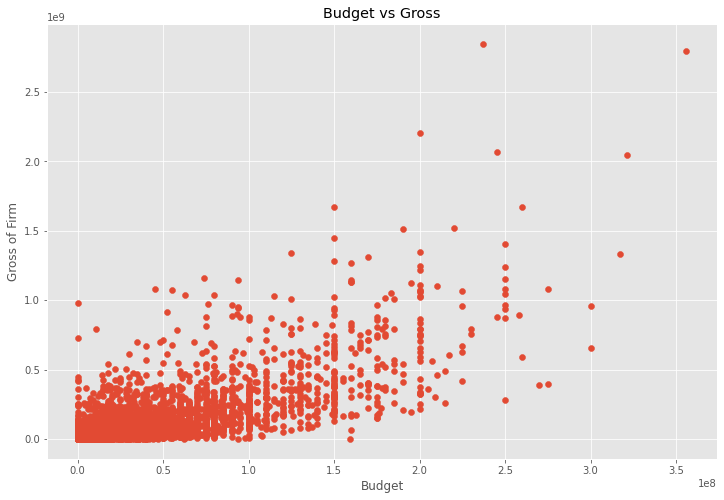

In [86]:
plt.scatter(x=df.budget,y=df.gross)
plt.title("Budget vs Gross")
plt.xlabel("Budget")
plt.ylabel("Gross of Firm")
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

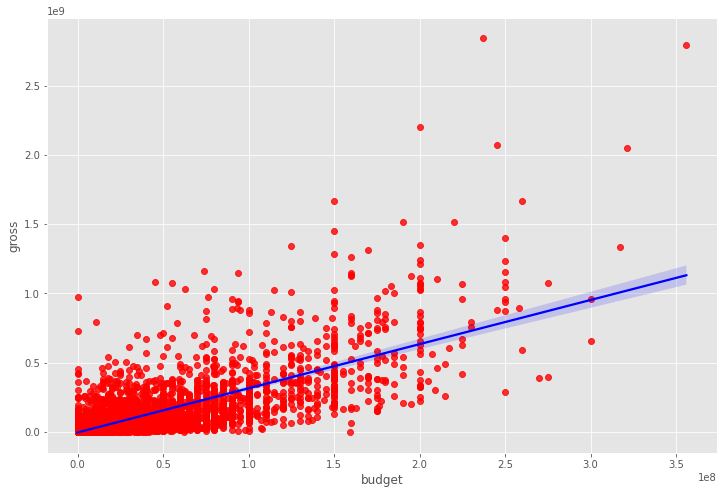

In [87]:
sns.regplot(x="budget",y="gross", data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

In [88]:
#Calculate correlation

In [89]:
#High correlation between Gross and (votes and budget)

df.corr(method='pearson') #Pearson, Kendall, Spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222427,0.309212,0.261900,0.116358
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.398387
votes,0.222427,0.409182,1.000000,0.486931,0.632870,0.306984
budget,0.309212,0.055665,0.486931,1.000000,0.750157,0.268372
gross,0.261900,0.186392,0.632870,0.750157,1.000000,0.244339
runtime,0.116358,0.398387,0.306984,0.268372,0.244339,1.000000


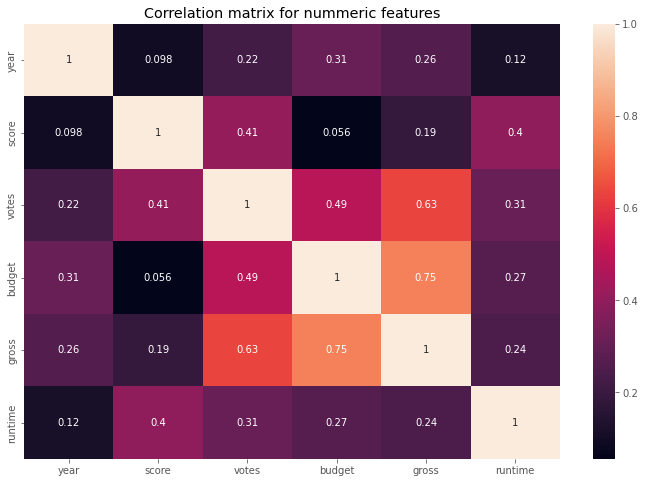

In [90]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix , annot=True)
plt.title("Correlation matrix for nummeric features")
plt.show()

In [92]:
#Turn object type columns into category type columns to use in the correlation matrix

df_encoded = df.copy()
le = preprocessing.LabelEncoder()

cols = ["rating", "genre", "director", "writer", "star", "country", "company"]


for col in cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])
    print(le.classes_)


['Approved' 'G' 'NC-17' 'Not Rated' 'PG' 'PG-13' 'R' 'TV-14' 'TV-MA'
 'TV-PG' 'Unrated' 'X' nan]
['Action' 'Adventure' 'Animation' 'Biography' 'Comedy' 'Crime' 'Drama'
 'Family' 'Fantasy' 'History' 'Horror' 'Music' 'Musical' 'Mystery'
 'Romance' 'Sci-Fi' 'Sport' 'Thriller' 'Western']
['A.R. Murugadoss' 'Aamir Khan' 'Aaron Blaise' ... 'Élie Chouraqui'
 'Éric Rohmer' 'Éva Gárdos']
["'Weird Al' Yankovic" 'A L Katz' 'A.A. Milne' ... 'Éric Rohmer'
 'Éva Gárdos' nan]
["'Weird Al' Yankovic" '50 Cent' 'A.J. Cook' ... 'Álex Angulo'
 'Émilie Dequenne' nan]
['Argentina' 'Aruba' 'Australia' 'Austria' 'Belgium' 'Brazil' 'Canada'
 'Chile' 'China' 'Colombia' 'Czech Republic' 'Denmark'
 'Federal Republic of Yugoslavia' 'Finland' 'France' 'Germany' 'Greece'
 'Hong Kong' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Ireland'
 'Israel' 'Italy' 'Jamaica' 'Japan' 'Kenya' 'Lebanon' 'Libya' 'Malta'
 'Mexico' 'Netherlands' 'New Zealand' 'Norway' 'Panama' 'Philippines'
 'Poland' 'Portugal' 'Republic of Maced

In [93]:
df_encoded.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_fixed
0,The Shining,6,6,1980,"June 13, 1980 (United States)",8.4,927000,2589,4014,1047,54,19000000,46998772,2319,146,1980
1,The Blue Lagoon,6,1,1980,"July 2, 1980 (United States)",5.8,65000,2269,1632,327,55,4500000,58853106,731,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,4,0,1980,"June 20, 1980 (United States)",8.7,1200000,1111,2567,1745,55,18000000,538375067,1540,124,1980
3,Airplane!,4,4,1980,"July 2, 1980 (United States)",7.7,221000,1301,2000,2246,55,3500000,83453539,1812,88,1980
4,Caddyshack,6,4,1980,"July 25, 1980 (United States)",7.3,108000,1054,521,410,55,6000000,39846344,1777,98,1980


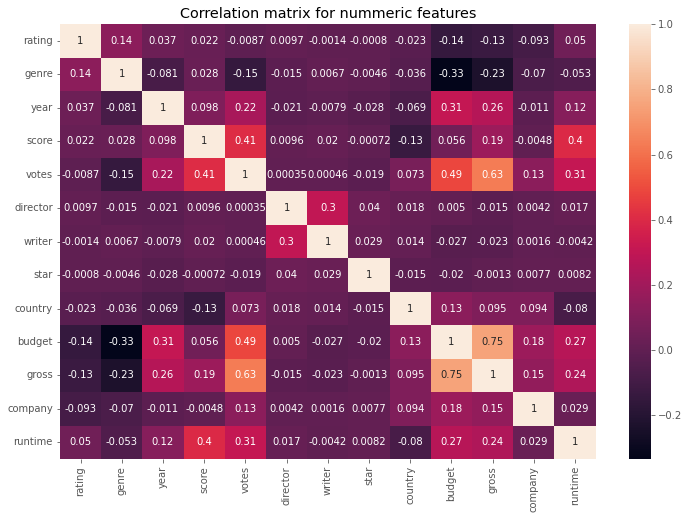

In [94]:
correlation_matrix = df_encoded.corr(method='pearson')

sns.heatmap(correlation_matrix , annot=True)
plt.title("Correlation matrix for nummeric features")
plt.show()

In [95]:
df_encoded.corr()

,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
rating,1.000000,0.137018,0.037372,0.022385,-0.008694,0.009701,-0.001399,-0.000801,-0.023496,-0.141346,-0.129019,-0.092886,0.049791
genre,0.137018,1.000000,-0.081261,0.027965,-0.145296,-0.015258,0.006747,-0.004601,-0.035765,-0.334021,-0.234297,-0.069927,-0.052914
year,0.037372,-0.081261,1.000000,0.097995,0.222427,-0.020795,-0.007894,-0.027944,-0.069300,0.309212,0.261900,-0.011477,0.116358
score,0.022385,0.027965,0.097995,1.000000,0.409182,0.009559,0.019804,-0.000721,-0.134642,0.055665,0.186392,-0.004850,0.398387
votes,-0.008694,-0.145296,0.222427,0.409182,1.000000,0.000349,0.000461,-0.019389,0.073466,0.486931,0.632870,0.130308,0.306984
director,0.009701,-0.015258,-0.020795,0.009559,0.000349,1.000000,0.299510,0.039903,0.017953,0.004976,-0.014916,0.004240,0.017062
writer,-0.001399,0.006747,-0.007894,0.019804,0.000461,0.299510,1.000000,0.028947,0.014394,-0.026810,-0.022957,0.001556,-0.004220
star,-0.000801,-0.004601,-0.027944,-0.000721,-0.019389,0.039903,0.028947,1.000000,-0.015178,-0.020246,-0.001340,0.007720,0.008164
country,-0.023496,-0.035765,-0.069300,-0.134642,0.073466,0.017953,0.014394,-0.015178,1.000000,0.130982,0.094785,0.094264,-0.080349
budget,-0.141346,-0.334021,0.309212,0.055665,0.486931,0.004976,-0.026810,-0.020246,0.130982,1.000000,0.750157,0.182081,0.268372


In [96]:
correlation_mat = df_encoded.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

rating   rating     1.000000
         genre      0.137018
         year       0.037372
         score      0.022385
         votes     -0.008694
                      ...   
runtime  country   -0.080349
         budget     0.268372
         gross      0.244339
         company    0.029052
         runtime    1.000000
Length: 169, dtype: float64

In [97]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget   genre     -0.334021
genre    budget    -0.334021
         gross     -0.234297
gross    genre     -0.234297
votes    genre     -0.145296
                      ...   
score    score      1.000000
year     year       1.000000
genre    genre      1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 169, dtype: float64

In [98]:
high_corr = sorted_pairs.loc[sorted_pairs > 0.4 , sorted_pairs != 1]

high_corr

score   votes     0.409182
votes   score     0.409182
budget  votes     0.486931
votes   budget    0.486931
gross   votes     0.632870
votes   gross     0.632870
budget  gross     0.750157
gross   budget    0.750157
dtype: float64

Gross and Budget have the highest correlation, followed by Gross and Votes